In [155]:
import Pkg
Pkg.add("Revise")
Pkg.add("IonSim")
Pkg.add("QuantumOptics")
Pkg.add("StochasticDiffEq")
Pkg.add("DSP")
using PyPlot
using Revise
using IonSim
using QuantumOptics: timeevolution, stochastic, Basis

   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`


In [3]:
ca = Ca40([("S1/2", -1/2, "S"), ("D5/2", -1/2, "D")])
print(ca)

⁴⁰Ca
("S1/2", -1//2): "S"
("D5/2", -1//2): "D"


In [138]:
laser = Laser()
print(laser)

λ: missing m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.7071067811865475, z=0.0)
k̂: (x=0, y=0, z=1)
I(t=0): 0 W/m²
ϕ(t=0): 0.0 ⋅ 2π


In [139]:
chain = LinearChain(
        ions=[ca],
        comfrequencies=(x=3e6,y=3e6,z=1e6), 
        selectedmodes=(;z=[1])
    )
print(typeof(chain) <: IonTrap)
chamber = Chamber(iontrap=chain, B=4e-4, Bhat=ẑ, δB=0, lasers=[laser]);

true

In [140]:
λ = transitionwavelength(ca, ("S", "D"), chamber)
wavelength!(laser, λ)
#L.λ = transitionwavelength(C, ("g", "e"), T)

print(wavelength(laser))

7.291469960190796e-7

In [141]:
wavelength_from_transition!(laser, ca, ("S", "D"), chamber)

7.291469960190796e-7

In [ ]:
polarization!(laser, (x̂ - ẑ)/√2)
wavevector!(laser, (x̂ + ẑ)/√2);

In [125]:
intensity_from_pitime!(laser, 2e-6, ca, ("S", "D"), chamber);  # Sets pi_time to 2 μs

In [ ]:

intensity_from_pitime!(laser, 2.5e-6, ca, ("S", "D"), chamber);  # Sets pi_time to 2.5 μs

In [107]:
E_amplitude = 100000 #Efield_from_pi_time(pi_time, T, 1, 1, ("g", "e"))
intensity!(laser, t->E_amplitude) # This sets a constant (square) pulse


#7 (generic function with 1 method)

In [142]:
print(laser)

λ: 7.291469960190796e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.7071067811865475, z=0.0)
k̂: (x=0, y=0, z=1)
I(t=0): 0 W/m²
ϕ(t=0): 0.0 ⋅ 2π


In [127]:
h = hamiltonian(chamber, timescale=1e-6, rwa_cutoff=Inf);

In [143]:
ion = ions(chamber)[1]

ψ0_ion_1 = ion["S"]
ψ0_ion_2 = ion[("S1/2", -1/2)]
ψ0_ion_3 = ionstate(ion, "S")

print(ψ0_ion_1)

Ket(dim=2)
  basis: ⁴⁰Ca
 1.0 + 0.0im
 0.0 + 0.0im

In [144]:
mode = modes(chamber)[1]

ψ0_mode_1 = mode[0]
ψ0_mode_2 = fockstate(mode, 0)
ψ0_mode_3 = groundstate(mode)

print(ψ0_mode_1)

Ket(dim=11)
  basis: VibrationalMode(ν=1.0e6, axis=ẑ, N=10)
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

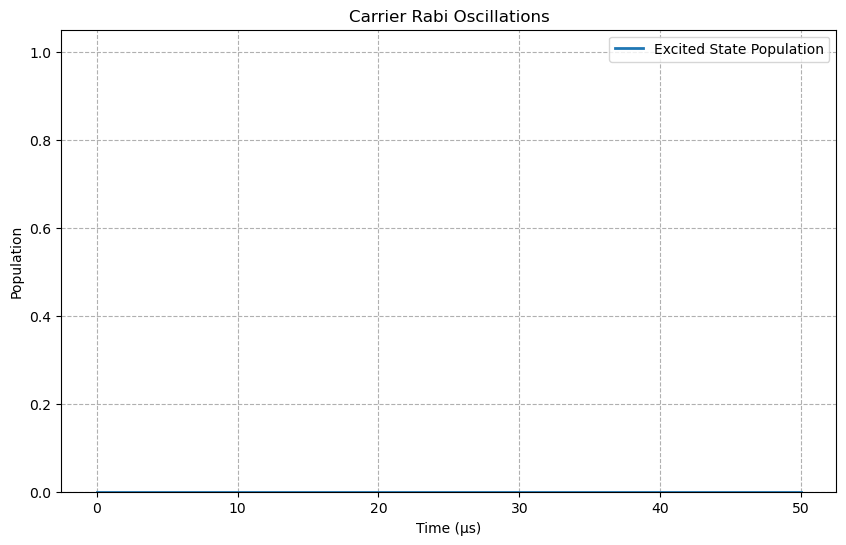

In [158]:
C = Ca40([("S1/2", -1/2, "g"),("D5/2", -1/2, "e")])
# Create aliases for the qubit states for easier access
#set_sublevel_alias!(C, Dict("g" => ("S1/2", -1/2), "e" => ("D5/2", -1/2)))

# Define the trap configuration. We'll model a single ion in a linear chain
# with a 1 MHz axial motional frequency.
chain = LinearChain(
    ions=[C],
    comfrequencies=(x=3e6, y=3e6, z=1e6),
    selectedmodes=(;z=[1]) # We only consider the axial mode of motion
)

# Define the laser that will drive the transition
L = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T = Chamber(
    iontrap=chain,
    B=4e-4,              # Magnetic field in Tesla
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L]
)

# 3. Define Experiment and Pulse Parameters
# Set the laser properties. The Pulse(T, w, I, phi, t) parameters from your
# request are set here as properties of the laser object.
# 'w' (frequency) is set by Δ (detuning) and λ (wavelength).
# 'I' (intensity) is set by E (E-field amplitude).
# 'phi' is set by L.ϕ.
# 't' (time-dependence) is handled by the solver over a time span `tspan`.
L.k = (x̂ + ẑ)/√2       # Laser wavevector
L.ϵ = (x̂ - ẑ)/√2       # Laser polarization
L.λ = transitionwavelength(C, ("g", "e"), T) # Set laser wavelength to be resonant with the transition

# For a carrier transition, we set the detuning to zero.
L.Δ = 0.0
pi_time = 2.5e-6
E_amplitude = 100000 #Efield_from_pi_time(pi_time, T, 1, 1, ("g", "e"))
intensity!(laser, t->E_amplitude) # This sets a constant (square) pulse

# 4. Construct Hamiltonian and Run Simulation
# Set the Hilbert space dimension for the motional mode (max number of phonons)
mode = zmodes(T)[1]
#mode.N = 10

# Construct the time-independent Hamiltonian for the system
# For a simple square pulse, the Hamiltonian is not time-dependent.
# We set a high rwa_cutoff to ensure all terms are included.
h = hamiltonian(T, rwa_cutoff=Inf)

# Define the initial state: ion in the ground state |g⟩ and motional mode in
# the ground state |0⟩.
ψ_mode = fockstate(mode[1].basis, 0)
ψ₀ = C["g"] ⊗ ψ_mode

# Define the time span for the simulation. We'll run it for two pi-times (5 µs)
# to see a full Rabi flop.
#tspan = 0:0.05e-6:5e-6

t_cal_max = 50e-6 
tspan = 0:t_cal_max/1000:t_cal_max
# Solve the time evolution using the Schrödinger equation solver from QuantumOptics.jl
tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)

# 5. Analyze and Visualize the Results
# Calculate the population in the excited state |e⟩ over time
excited_pop = expect(ionprojector(T, "e"), sol)

# Create the plot using PyPlot
figure(figsize=(10, 6))
plot(tout.* 1e6, real.(excited_pop), label="Excited State Population", color="C0", linewidth=2)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()

In [104]:
ψ0_mode_1 == ψ0_mode_2 == ψ0_mode_3

true

In [105]:
ψ0 = ion["S"] ⊗ mode[0];

  0.000578 seconds (2.77 k allocations: 576.516 KiB)


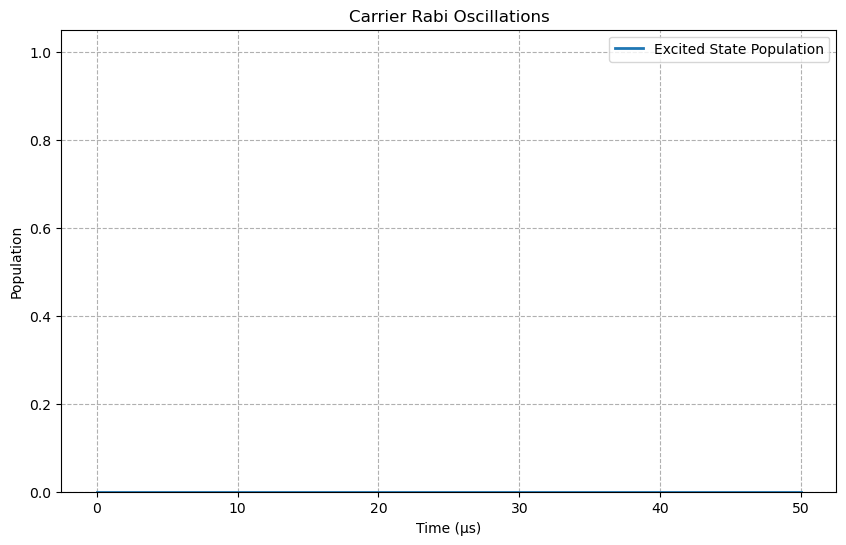

In [159]:
t_cal_max = 50e-6 
tspan = 0:t_cal_max/1000:t_cal_max
@time tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ0, h)


# ex = expect(ionprojector(chamber, "D"), sol)
# plt.plot(tout, ex)
# plt.xlim(tout[1], tout[end])
# plt.ylim(0, 1)
# plt.ylabel("Excitation")
# plt.xlabel("Time (μs)");

excited_pop = expect(ionprojector(T, "e"), sol)

# Create the plot using PyPlot
figure(figsize=(10, 6))
plot(tout.* 1e6, real.(excited_pop), label="Excited State Population", color="C0", linewidth=2)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()

  0.000229 seconds (131 allocations: 14.688 KiB)


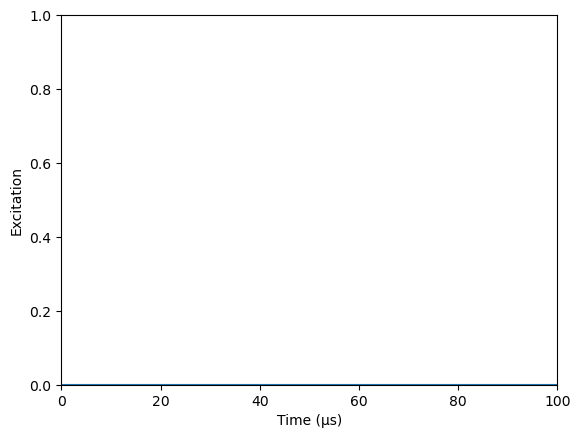

In [160]:
detuning!(laser, 2.5e5)

tspan = (0.0, 100)  # Time span for the simulation
h = hamiltonian(chamber, timescale=1e-6)
@time tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ0, h)

ex = expect(ionprojector(chamber, "D"), sol)
plt.plot(tout, ex)
plt.xlim(tout[1], tout[end])
plt.ylim(0, 1)
plt.ylabel("Excitation")
plt.xlabel("Time (μs)");

  0.166391 seconds (908.73 k allocations: 23.753 MiB, 54.29% gc time)


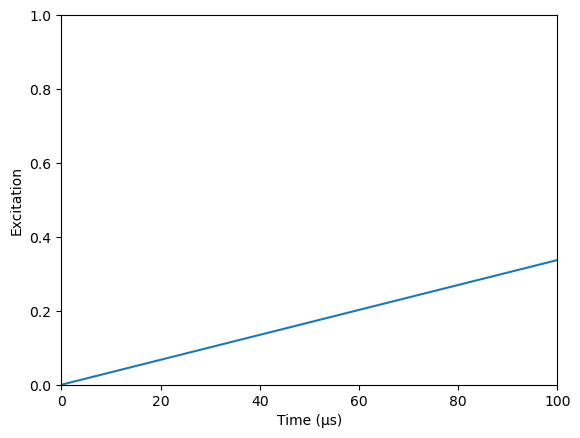

In [19]:
detuning!(laser, 9)

manualshift!(ca, "S", -1.25e5)
manualshift!(ca, "D", 1.25e5)

h = hamiltonian(chamber, timescale=1e-6)
@time tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ0, h)

ex = expect(ionprojector(chamber, "D"), sol)
plt.plot(tout, ex)
plt.xlim(tout[1], tout[end])
plt.ylim(0, 1)
plt.ylabel("Excitation")
plt.xlabel("Time (μs)");

In [44]:
modecutoff(mode)

10

In [45]:
modecutoff!(mode, 100)
modecutoff(mode)

100

In [52]:
# reset all manual shifts to zero
zeromanualshift!(ca)

# create initial state in terms of denisty matrices
ψi_ion = ca["S"] ⊗ ca["S"]#dm(ca["S"]) 
ψi_mode = thermalstate(mode, 10)
ψi = ψi_ion ⊗ ψi_mode

tspan = 0:0.1:50
h = hamiltonian(chamber, timescale=1e-6, rwa_cutoff=Inf, time_dependent_eta=false, displacement="truncated")
@time tout, sol = timeevolution.schroedinger_dynamic(tspan, ψi, h);

LoadError: MethodError: no method matching mul!(::QuantumOpticsBase.Operator{QuantumInterface.CompositeBasis{Vector{Int64}, Tuple{IonInstance{:Ca40}, IonInstance{:Ca40}, VibrationalMode}}, VibrationalMode, Matrix{ComplexF64}}, ::QuantumOpticsBase.Operator{QuantumInterface.CompositeBasis{Vector{Int64}, Tuple{IonInstance{:Ca40}, VibrationalMode}}, QuantumInterface.CompositeBasis{Vector{Int64}, Tuple{IonInstance{:Ca40}, VibrationalMode}}, SparseArrays.SparseMatrixCSC{ComplexF64, Int64}}, ::QuantumOpticsBase.Operator{QuantumInterface.CompositeBasis{Vector{Int64}, Tuple{IonInstance{:Ca40}, IonInstance{:Ca40}, VibrationalMode}}, VibrationalMode, Matrix{ComplexF64}}, ::ComplexF64, ::ComplexF64)

[0mClosest candidates are:
[0m  mul!([91m::ChainRulesCore.AbstractThunk[39m, ::Any, ::Any, ::Any, ::Any)
[0m[90m   @[39m [33mChainRulesCore[39m [90mC:\Users\jewoo\.julia\packages\ChainRulesCore\XAgYn\src\tangent_types\[39m[90m[4mthunks.jl:103[24m[39m
[0m  mul!(::Any, [91m::ChainRulesCore.AbstractThunk[39m, ::Any, ::Any, ::Any)
[0m[90m   @[39m [33mChainRulesCore[39m [90mC:\Users\jewoo\.julia\packages\ChainRulesCore\XAgYn\src\tangent_types\[39m[90m[4mthunks.jl:113[24m[39m
[0m  mul!(::Any, ::Any, [91m::ChainRulesCore.AbstractThunk[39m, ::Any, ::Any)
[0m[90m   @[39m [33mChainRulesCore[39m [90mC:\Users\jewoo\.julia\packages\ChainRulesCore\XAgYn\src\tangent_types\[39m[90m[4mthunks.jl:114[24m[39m
[0m  ...
